# 🚗 Australian cars Prices Analysis

This project analyzes cars price trends in Australia based on various features like brand, year, fuel type, transmission, and more. The goal is to understand the key factors affecting cars prices and potentially build a predictive model.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")


In [16]:
# Upload the ZIP file
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (2).zip


In [ ]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("vehicle_data")

# Check extracted files
os.listdir("vehicle_data")


In [20]:
import pandas as pd

# Load the extracted CSV
df = pd.read_csv("vehicle_data/Australian Vehicle Prices.csv")

# Show the first few rows
df.head()


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


## 🔍 Basic Exploration

We'll use basic functions to get a feel for the data.


In [22]:
df.shape

(16734, 19)

In [23]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [24]:
df.dtypes

,0
Brand,object
Year,float64
Model,object
Car/Suv,object
Title,object
UsedOrNew,object
Transmission,object
Engine,object
DriveType,object
FuelType,object


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [26]:
df.describe()

,Year
count,16733.000000
mean,2016.229248
std,5.247705
min,1940.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2023.000000


In [27]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [28]:
df.tail()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888
16733,Mercedes-Benz,2021.0,C200,Sedan,2021 Mercedes-Benz C200,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,7 L / 100 km,31852,Gold / -,"Yatala, QLD",4 cyl,Sedan,4 Doors,5 Seats,65888


In [29]:
df.sample(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
1975,Kia,2015.0,Cerato,Hatchback,2015 Kia Cerato S,USED,Automatic,"4 cyl, 1.8 L",Front,Unleaded,7.1 L / 100 km,119190,Blue / -,"Smithfield, NSW",4 cyl,Hatchback,5 Doors,5 Seats,14800
4469,Mini,2016.0,Cooper,Hatchback,2016 Mini Cooper S,USED,Automatic,"4 cyl, 2 L",Front,Premium,5.5 L / 100 km,69904,Blue / Blue,"Osborne Park, WA",4 cyl,Hatchback,3 Doors,4 Seats,27999
6951,Volkswagen,2016.0,Tiguan,SUV,2016 Volkswagen Tiguan 132 TSI (4X4),USED,Automatic,"4 cyl, 2 L",AWD,Premium,8.8 L / 100 km,80771,Beige / -,"Cardiff, NSW",4 cyl,SUV,4 Doors,5 Seats,19913
9357,Toyota,2021.0,RAV4,SUV,2021 Toyota RAV4 Cruiser (2WD) Hybrid,USED,Automatic,"4 cyl, 2.5 L",Front,Hybrid,4.7 L / 100 km,101234,White / Black,"Melbourne, VIC",4 cyl,SUV,5 Doors,5 Seats,50950
9962,Nissan,2022.0,X-Trail,SUV,2022 Nissan X-Trail TI (4WD),USED,Automatic,"4 cyl, 2.5 L",4WD,Unleaded,7.8 L / 100 km,10844,White / Grey,"Hoppers Crossing, VIC",4 cyl,SUV,4 Doors,5 Seats,55990


In [30]:
df['Brand'].unique()

array(['Ssangyong', 'MG', 'BMW', 'Mercedes-Benz', 'Renault', 'Toyota',
       'Land', 'Nissan', 'Honda', 'Volkswagen', 'Mitsubishi', 'Ford',
       'Subaru', 'Hyundai', 'Jeep', 'Volvo', 'Mazda', 'Abarth', 'Holden',
       'Audi', 'Kia', 'Mini', 'Peugeot', 'Suzuki', 'Dodge', 'Porsche',
       'Daihatsu', 'Isuzu', 'Lexus', 'Jaguar', 'Rolls-Royce', 'Skoda',
       'Fiat', 'Haval', 'Citroen', 'LDV', 'HSV', 'Foton', 'Mahindra',
       'Maserati', 'Alfa', 'GWM', 'Ram', 'Tesla', 'Genesis', 'Chrysler',
       'Great', 'Opel', 'Saab', 'Bentley', 'Rover', nan, 'Ferrari',
       'Cupra', 'Chevrolet', 'Lamborghini', 'FPV', 'McLaren', 'Chery',
       'Iveco', 'Hummer', 'Infiniti', 'BYD', 'Tata', 'Aston', 'Daewoo',
       'Proton', 'Geely', 'Smart', 'Ineos', 'Caterham', 'Hino',
       'International', 'Lotus', 'Polestar', 'Datsun', 'Packard'],
      dtype=object)

In [31]:
df['Brand'].nunique()

76

In [32]:
df['FuelType'].value_counts()

,count
FuelType,
Unleaded,6985
Diesel,4905
Premium,3377
Hybrid,652
-,637
Electric,115
Other,42
LPG,15
Leaded,5


In [33]:
df['Transmission'].value_counts()

,count
Transmission,
Automatic,14530
Manual,1952
-,251


In [34]:
df['Year'].min(), df['Year'].max()

(1940.0, 2023.0)

In [36]:
# Convert 'Price' to numeric, coercing errors
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Price'].mean()

np.float64(37303.33463221629)

In [37]:
df['Price'].median()

29500.0

In [38]:
df['Price'].max()

1500000.0

In [39]:
df['Price'].min()

88.0

In [40]:
df.isnull().sum()

,0
Brand,1
Year,1
Model,1
Car/Suv,28
Title,1
UsedOrNew,1
Transmission,1
Engine,1
DriveType,1
FuelType,1


In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df['Seats'].mode()

,Seats
0,5 Seats


## 🧹 Data Cleaning

We remove duplicates, handle missing values, and clean data types.


In [43]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [46]:
# Convert Kilometres to numeric and fill missing
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce')
df['Kilometres'] = df['Kilometres'].fillna(df['Kilometres'].median())

In [47]:

# Drop rows missing essential values
df.dropna(subset=['Price', 'Brand'], inplace=True)

## 🔎 Data Filtering

We apply filters to subset data for analysis.


In [48]:
# Automatic cars only
automatic_cars = df[df['Transmission'] == 'Automatic']

In [49]:

# Cars above ₹50,000
expensive_cars = df[df['Price'] > 50000]

In [50]:
# Toyota cars
toyota_cars = df[df['Brand'] == 'Toyota']


## ↕️ Sorting

Sort the data based on different columns.


In [51]:
# Price ascending
df.sort_values(by='Price').head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
15831,Alfa,2006.0,Romeo,Sedan,2006 Alfa Romeo 156 JTS,USED,Manual,"4 cyl, 2 L",Front,Premium,9.5 L / 100 km,90000.0,Cream / -,"Sydney, NSW",4 cyl,Sedan,4 Doors,5 Seats,88.0
12460,Daewoo,1998.0,Lanos,Sedan,1998 Daewoo Lanos SE,USED,Manual,"4 cyl, 1.5 L",Front,Unleaded,8.8 L / 100 km,310000.0,Green / -,"Mount Louisa, QLD",4 cyl,Sedan,4 Doors,5 Seats,900.0
13203,Mazda,2004.0,6,Hatchback,2004 Mazda 6 Luxury Sports,USED,Automatic,"4 cyl, 2.3 L",Front,Premium,10 L / 100 km,201123.0,Blue / -,"Mount Louisa, QLD",4 cyl,Hatchback,5 Doors,5 Seats,1200.0
1747,Chrysler,2008.0,Sebring,Sedan,2008 Chrysler Sebring Limited,USED,Automatic,"4 cyl, 2.4 L",Front,Unleaded,8.9 L / 100 km,129863.0,Blue / Grey,"Wentworthville, NSW",4 cyl,Sedan,4 Doors,5 Seats,1895.0
4862,Mercedes-Benz,2002.0,MB100,Commercial,2002 Mercedes-Benz MB100 D (2.9),USED,Manual,"5 cyl, 2.9 L",Front,Diesel,0 L / 100 km,460269.0,White / Grey,"Wentworthville, NSW",5 cyl,Commercial,4 Doors,2 Seats,1895.0


In [52]:
# Kilometres descending
df.sort_values(by='Kilometres', ascending=False).head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
14706,Mercedes-Benz,2001.0,Sprinter,Auto Market WA,2001 Mercedes-Benz Sprinter,USED,Automatic,-,Other,Diesel,-,533849.0,White / -,"Wangara, WA",-,Commercial,NaN,NaN,9999.0
12955,Toyota,2007.0,Hilux,Ute / Tray,2007 Toyota Hilux SR,USED,Manual,"4 cyl, 3 L",Rear,Diesel,8.6 L / 100 km,526162.0,White / -,"Prospect, SA",4 cyl,Ute / Tray,4 Doors,5 Seats,9999.0
3306,Ford,2010.0,Falcon,Sedan,2010 Ford Falcon G6E,USED,Automatic,"6 cyl, 4 L",Rear,Unleaded,10.1 L / 100 km,521771.0,Silver / Black Leather,"Minchinbury, NSW",6 cyl,Sedan,4 Doors,5 Seats,6880.0
5320,Toyota,2006.0,Hilux,Ute / Tray,2006 Toyota Hilux SR5 (4X4),USED,Automatic,"4 cyl, 3 L",4WD,Diesel,9.5 L / 100 km,520991.0,Gold / -,"Eastern Creek, NSW",4 cyl,Ute / Tray,4 Doors,5 Seats,14900.0
11778,Holden,2007.0,Rodeo,Ute / Tray,2007 Holden Rodeo LT,USED,Automatic,"6 cyl, 3.6 L",Rear,Unleaded,12.8 L / 100 km,520000.0,White / Grey,"Brooklyn, VIC",6 cyl,Ute / Tray,4 Doors,5 Seats,7999.0


In [53]:

# Year + Price sorting
df.sort_values(by=['Year', 'Price'], ascending=[False, True]).head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
7830,MG,2023.0,MG3,Ringwood Nissan and MG New & Demo,2023 MG MG3 Auto Core,NEW,Automatic,"4 cyl, 1.5 L",Front,-,6.7 L / 100 km,10.0,White / Black,"Ringwood, VIC",4 cyl,Hatchback,5 Doors,5 Seats,18990.0
13045,MG,2023.0,MG3,Hatchback,2023 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,-,6.7 L / 100 km,942.0,Silver / Black,"Somerton Park, SA",4 cyl,Hatchback,5 Doors,5 Seats,19490.0
15799,MG,2023.0,MG3,NEW In stock,2023 MG MG3 Core,NEW,Automatic,-,Other,-,-,22.0,White / Cloth,"Brookvale, NSW",-,Hatchback,NaN,NaN,19490.0
14788,Kia,2023.0,RIO,NEW Available to order,2023 Kia RIO S,NEW,Manual,"4 cyl, 1.4 L",Front,Unleaded,5.6 L / 100 km,85951.5,7 years / Unlimited km,NaN,4 cyl,Hatchback,5 Doors,5 Seats,19690.0
10660,MG,2023.0,MG3,Springwood MG - New,2023 MG MG3 Auto Excite (with Navigation),NEW,Automatic,"4 cyl, 1.5 L",Front,-,6.7 L / 100 km,85951.5,Black / -,"Springwood, QLD",4 cyl,Hatchback,5 Doors,5 Seats,20990.0


## 📊 Aggregation

Group and summarize data using aggregation functions.


In [54]:
# Avg price by brand
df.groupby('Brand')['Price'].mean().sort_values(ascending=False)



,Price
Brand,
Lamborghini,542440.0
Ferrari,507441.0
McLaren,443588.5
International,341687.5
Rolls-Royce,329990.0
...,...
Proton,7990.0
Saab,6699.5
Geely,6450.0


In [55]:
# Cars count by year
df.groupby('Year').size()




,0
Year,
1940.0,1
1959.0,1
1970.0,1
1975.0,1
1978.0,1
1979.0,1
1981.0,2
1984.0,1
1985.0,2


In [56]:
# Avg price by fuel type
df.groupby('FuelType')['Price'].mean()

,Price
FuelType,
-,39231.283228
Diesel,41898.349836
Electric,86183.026087
Hybrid,57344.467692
LPG,15420.133333
Leaded,81072.000000
Other,34670.285714
Premium,48947.035587
Unleaded,25615.692330


## 📈 Data Visualizations

We use plots to analyze price distributions, trends, and categorical comparisons.


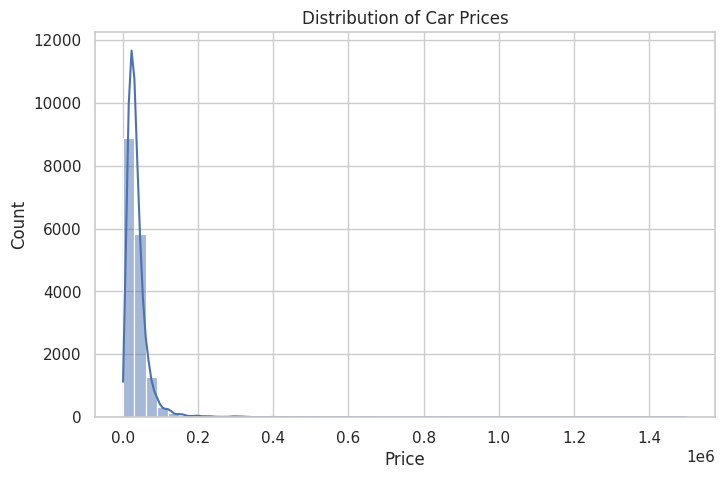

In [57]:
# 1. Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.show()


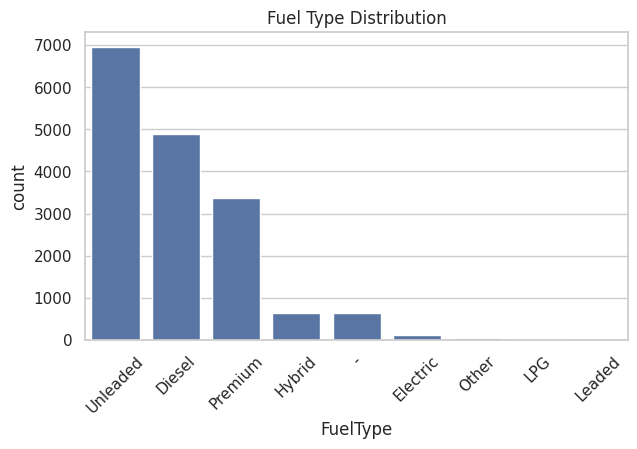

In [59]:

# 2. Fuel type count
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='FuelType', order=df['FuelType'].value_counts().index)
plt.title("Fuel Type Distribution")
plt.xticks(rotation=45)
plt.show()

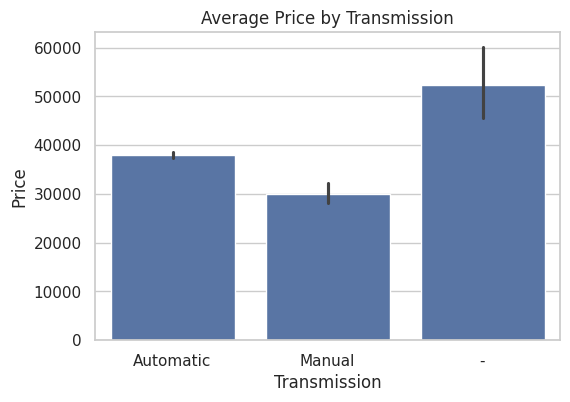

In [60]:

# 3. Avg price by transmission
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Transmission', y='Price')
plt.title("Average Price by Transmission")
plt.show()

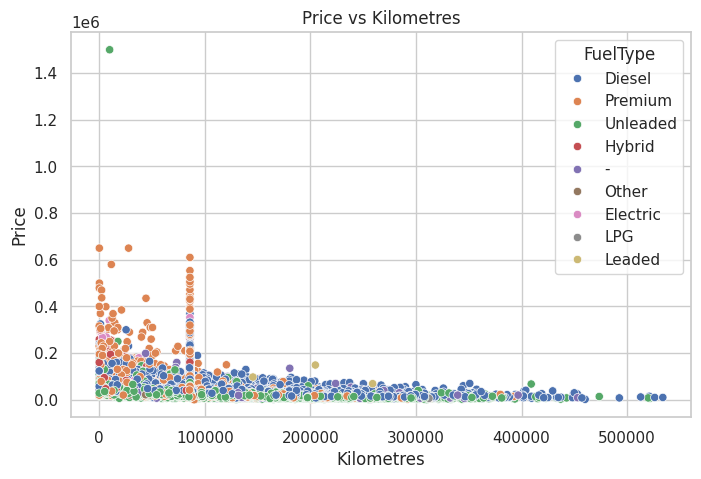

In [61]:

# 4. Price vs Kilometres
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Kilometres', y='Price', hue='FuelType')
plt.title("Price vs Kilometres")
plt.show()

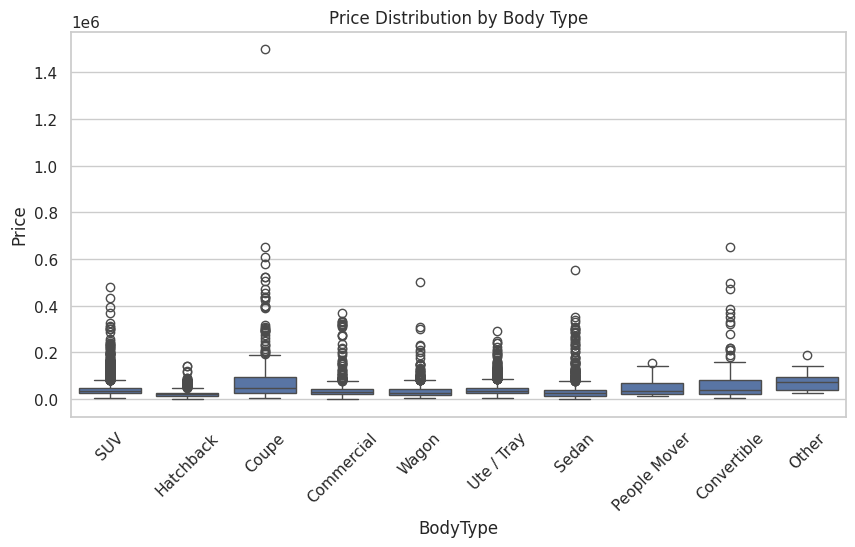

In [62]:

# 5. Boxplot: Price by Body Type
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='BodyType', y='Price')
plt.title("Price Distribution by Body Type")
plt.xticks(rotation=45)
plt.show()

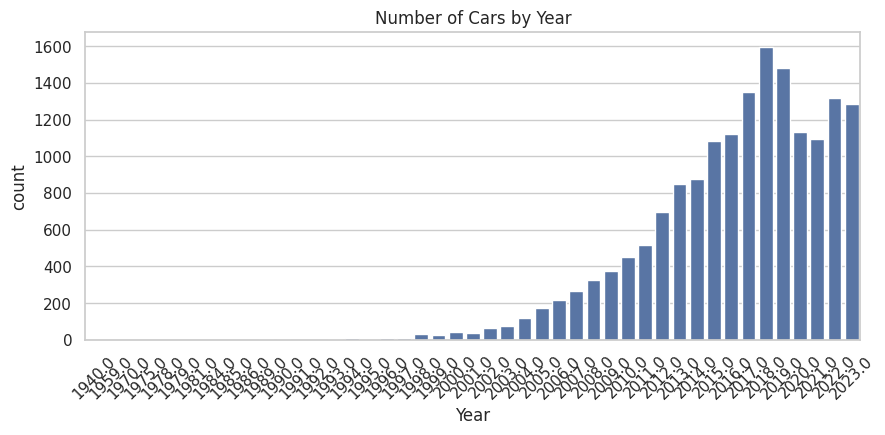

In [63]:

# 6. Cars by Year
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].dropna().unique()))
plt.title("Number of Cars by Year")
plt.xticks(rotation=45)
plt.show()

## ✅ Conclusion

- Majority of cars use **Automatic transmission** and **Petrol/Premium** fuel.
- **Price** is influenced by **Brand, Year, Fuel Type, and Kilometres**.
- Visualizations helped reveal patterns in **price distribution, trends, and outliers**.
- Further steps can include **predictive modeling** or **feature engineering**.
